In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/GCF_distance.csv")
df.head()

,Samples,BGC,BGC class,Distance from Atlas,Distance from MiBIG
0,CS,CS_MA1_NODE_1_length_373214_cov_10.948019.regi...,NRPS,1.010230,1.134367
1,CS,CS_MA1_NODE_11_length_165630_cov_10.811607.reg...,Terpene,0.903621,1.030998
2,CS,CS_MA1_NODE_14_length_152553_cov_10.893518.reg...,RiPPs,0.998154,1.086996
3,CS,CS_MA1_NODE_18_length_136436_cov_10.755381.reg...,PKS,1.035052,1.016302
4,CS,CS_MA1_NODE_19_length_136387_cov_10.888497.reg...,Terpene,0.726072,1.159078


# Visualize distance from BGC Atlas GCFs

In [3]:
# Bin distances
bin_width = 0.1  # Adjust for your dataset
bins = np.arange(0, 2, bin_width)
df['Bin'] = pd.cut(df['Distance from Atlas'], bins=bins, right=False)

In [4]:
# Pivot data for histogram
bgc_classes = df['BGC class'].unique()
hist_data = df.groupby(['Bin', 'BGC class']).size().unstack(fill_value=0)

<ipython-input-4-05c66927eab6>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hist_data = df.groupby(['Bin', 'BGC class']).size().unstack(fill_value=0)


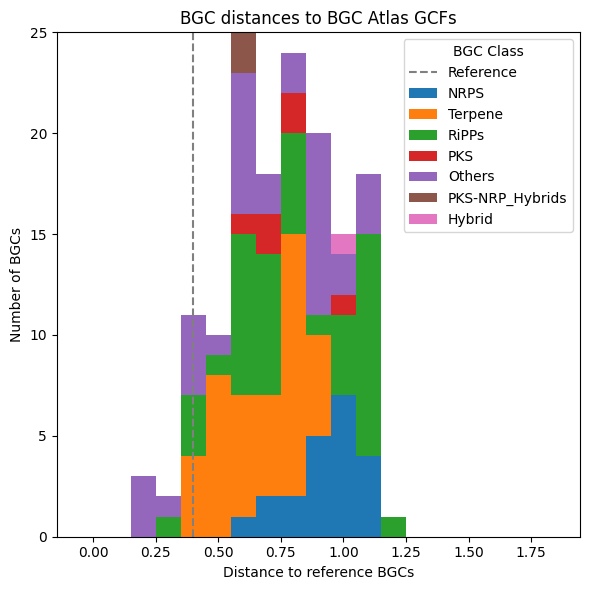

In [5]:
# Plot histogram with stacked bars
plt.figure(figsize=(6, 6))
bottom = np.zeros(len(bins) - 1)

for bgc_class in bgc_classes:
    plt.bar(
        bins[:-1],  # x-axis: bin edges
        hist_data[bgc_class].reindex(hist_data.index, fill_value=0),
        width=bin_width,
        bottom=bottom,  # stack bars
        label=bgc_class
    )
    bottom += hist_data[bgc_class].reindex(hist_data.index, fill_value=0)

# Add labels, legend, and customization
plt.xlabel("Distance to reference BGCs")
plt.ylabel("Number of BGCs")
plt.title("BGC distances to BGC Atlas GCFs")
plt.axvline(0.40, color='gray', linestyle='--', label="Reference")
plt.legend(title="BGC Class")
plt.tight_layout()

plt.show()

# Visualize distance from MiBIG GCFs

In [6]:
# Bin distances
bin_width = 0.1  # Adjust for your dataset
bins = np.arange(0, 2, bin_width)
df['Bin_1'] = pd.cut(df['Distance from MiBIG'], bins=bins, right=False)

In [7]:
# Pivot data for histogram
bgc_classes = df['BGC class'].unique()
hist_data_2 = df.groupby(['Bin_1', 'BGC class']).size().unstack(fill_value=0)

<ipython-input-7-949e990e5a57>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hist_data_2 = df.groupby(['Bin_1', 'BGC class']).size().unstack(fill_value=0)


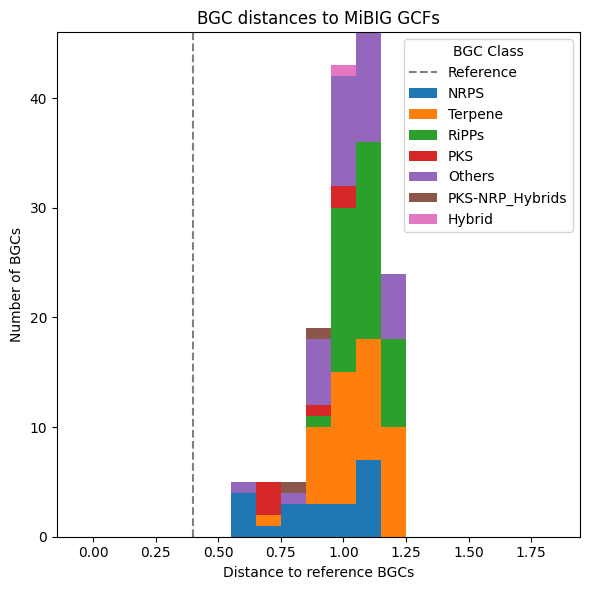

In [8]:
# Plot histogram with stacked bars
plt.figure(figsize=(6, 6))
bottom = np.zeros(len(bins) - 1)

for bgc_class in bgc_classes:
    plt.bar(
        bins[:-1],  # x-axis: bin edges
        hist_data_2[bgc_class].reindex(hist_data_2.index, fill_value=0),
        width=bin_width,
        bottom=bottom,  # stack bars
        label=bgc_class
    )
    bottom += hist_data_2[bgc_class].reindex(hist_data_2.index, fill_value=0)

# Add labels, legend, and customization
plt.xlabel("Distance to reference BGCs")
plt.ylabel("Number of BGCs")
plt.title("BGC distances to MiBIG GCFs")
plt.axvline(0.40, color='gray', linestyle='--', label="Reference")
plt.legend(title="BGC Class")
plt.tight_layout()

plt.show()